In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import partial_dependence
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv("loan_data.csv")
df_header=['credit.policy','int.rate','installment','log.annual.inc','dti' ,'fico' ,'days.with.cr.line' ,'revol.bal','revol.util','inq.last.6mths','delinq.2yrs' ,'pub.rec' ,'not.fully.paid' ,'purpose_credit_card' ,'purpose_debt_consolidation' ,'purpose_educational', 'purpose_home_improvement' ,'purpose_major_purchase' ,'purpose_small_business']
# Check both the datatypes and if there is missing values print it
print(f"{df.dtypes}\n")
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{df.isnull().sum()}")
df.head()

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

Sum of null values in each feature:
-----------------------------------
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
# Get number of positve and negative examples
pos = df[df["not.fully.paid"] == 1].shape[0]
neg = df[df["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Ratio of positive to negative examples = {(pos / neg) * 100:.2f}%")

Positive examples = 1533
Negative examples = 8045
Ratio of positive to negative examples = 19.06%


C:\Users\omool\Anaconda3\envs\ai_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


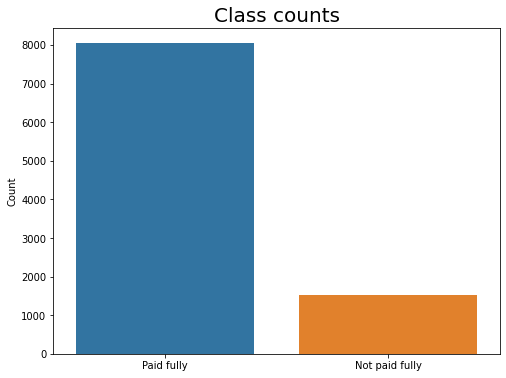

In [5]:
#graphical representation
plt.figure(figsize=(8, 6))
sns.countplot(df["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [6]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

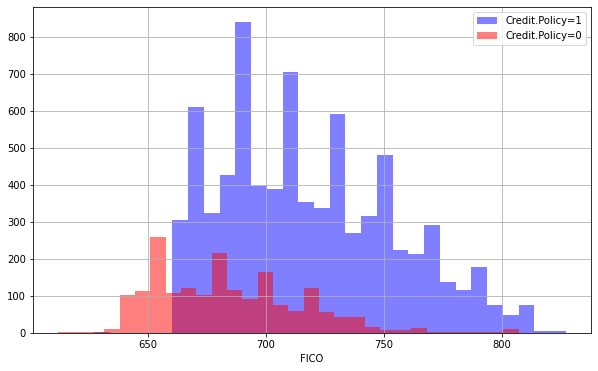

In [7]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

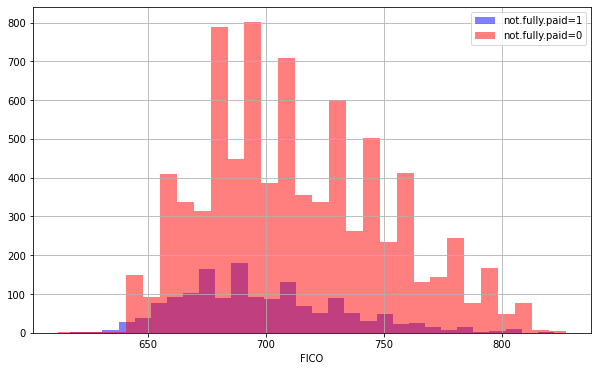

In [8]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

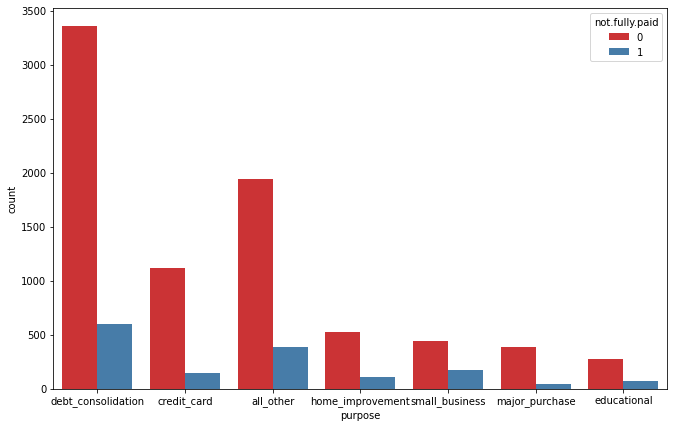

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

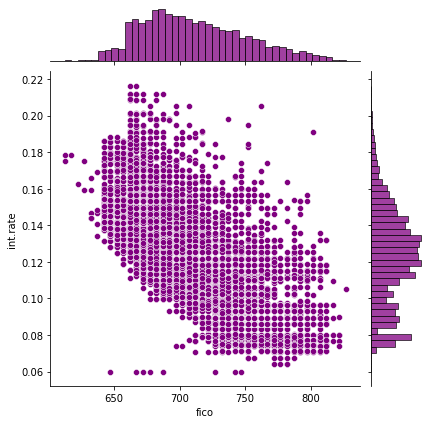

In [10]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

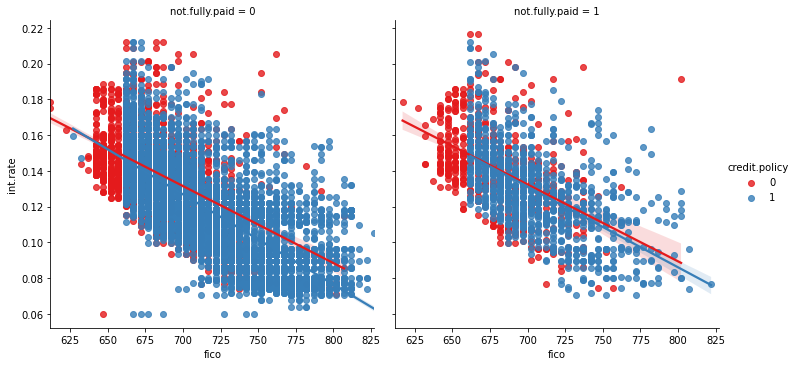

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data for modelling


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
cat_feats = ['purpose']

In [14]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [15]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [16]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
#implementation of RamdomUnderSampler
rand_undersampler = RandomUnderSampler()
X_new, y_new = rand_undersampler.fit_sample(X_train, y_train)



In [20]:
#shuffles the data
permute = np.random.permutation(X_new.shape[0])


In [21]:
X_new= np.random.permutation(X_new.shape[0])

y_new = np.random.permutation(y_new.shape[0])


In [22]:
#puts the missing value using feature means
puts = SimpleImputer()
puts.fit(X_train)
X_train = puts.transform(X_train)
X_test = puts.transform(X_test)

In [23]:
#Standardization
std = RobustScaler()
std.fit(X_train)
X_train=std.transform(X_train)
X_test = std.transform(X_test)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of The Models
### Firstly Decision Tree

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
print(classification_report(y_test,predictions))
print(f'Decision Accuracy {accuracy_score(y_test,predictions):.3f}')

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

Decision Accuracy 0.729


Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

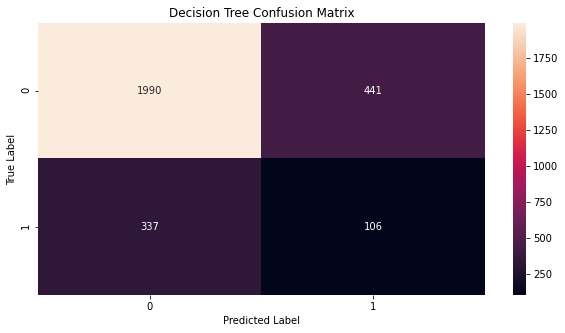

In [30]:
con_matrix1=confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,5))

sns.heatmap(con_matrix1,annot=True, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Decision Tree Confusion Matrix')

In [31]:
dtree.fit(RobustScaler().fit_transform(SimpleImputer(strategy="median").fit_transform(X_train)), y_train)

important = dtree.feature_importances_

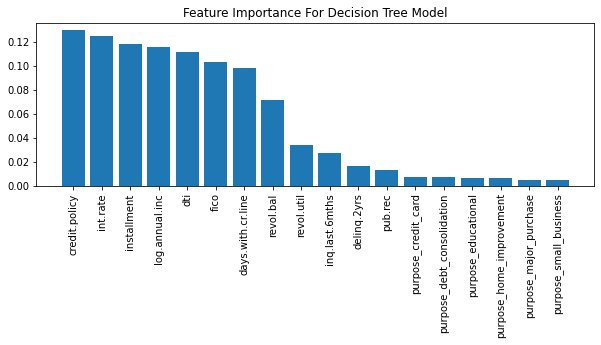

In [32]:
indice = np.argsort(important)[::-1]
plt.figure(figsize=(10,3))
plt.title('Feature Importance For Decision Tree Model')
plt.bar(range(X.shape[1]),important[indice])
plt.xticks(range(X.shape[1]), final_data.columns[final_data.columns != 'not.fully.paid'], rotation=90)
plt.show()

## Training the Random Forest model

In [33]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [34]:
rfc = RandomForestClassifier(n_estimators=600)

In [35]:
rand_forest_save=rfc.fit(X_train,y_train)
rand_forest_save

RandomForestClassifier(n_estimators=600)

### Feature Importance

In [36]:
# fit RF to plot feature importances
rfc.fit(RobustScaler().fit_transform(SimpleImputer(strategy="median").fit_transform(X_train)), y_train)

importances = rfc.feature_importances_

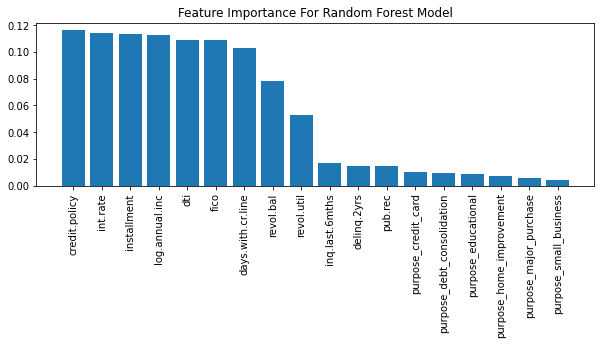

In [37]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,3))
plt.title('Feature Importance For Random Forest Model')
plt.bar(range(X.shape[1]),importances[indices])
plt.xticks(range(X.shape[1]), final_data.columns[final_data.columns != 'not.fully.paid'], rotation=90)
plt.show()

### Random Forest Predictions and Evaluation

In [38]:
predictions = rfc.predict(X_test)

In [39]:
print(classification_report(y_test,predictions))
print(f'Random Forest Accuracy {accuracy_score(y_test,predictions):.3f}')

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

Random Forest Accuracy 0.847


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

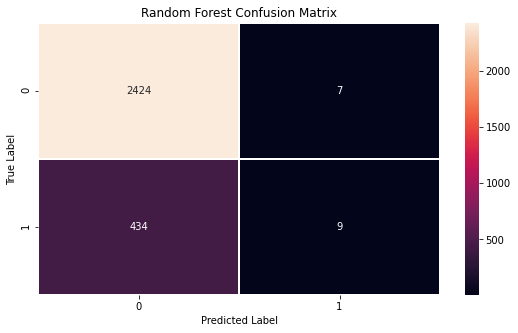

In [40]:
conf_matrix = confusion_matrix(y_test,predictions)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Random Forest Confusion Matrix')

### Predictions and Classification For Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test,y_pred))
print(f'Logistic Accuracy {accuracy_score(y_test,y_pred):.3f}')

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.50      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874

Logistic Accuracy 0.846


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

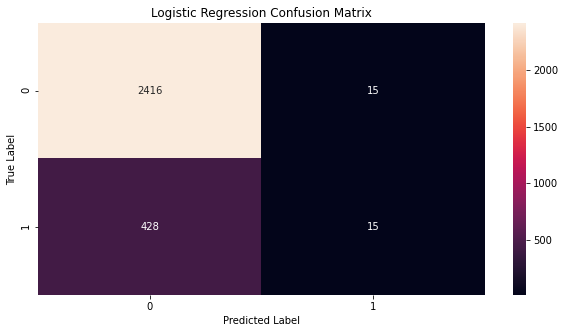

In [43]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Logistic Regression Confusion Matrix')

In [44]:
import pickle as p
p.dump( rfc, open( "GenesisDeploy.sav", "wb" ) )

In [45]:
# gbc = GradientBoostingClassifier(random_state=123)
# gbc.fit(X_new, y_new)
# figs, ax = plot_partial_dependence(gbc,X_new,np.argsort(gbc.feature_importances_)[::-1][:8]
#                                     ,n_cols=4,feature_names=final_data.columns[:-6],figsize=(14,8))

# #better look of the above
# plt.subplots_adjust(top=0.9)
# plt.suptitle('Partial Dependence Plot of Borrower Not Fully Paid\n Based on the Most Influencial Features')
# for a in ax: a.set_xticks(())
# for a in [ax[0], ax[4]]: a.set_ylabel("Partial dependence")